In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

ImportError: cannot import name 'AbstractMethodError'

## Loading the Train and Test Data

In [36]:
train = pd.read_parquet('train_data.parquet', engine='fastparquet')
test = pd.read_parquet('test_data.parquet', engine='fastparquet')
train.head()
test.head()

,driver_id,date,online_hours,gender,age,number_of_kids,weekday,weekend_flag,age_bucket
index,,,,,,,,,
0,111556,2017-06-01,2.0,FEMALE,49,4,3,0,2
1,111556,2017-06-02,2.0,FEMALE,49,4,4,0,2
2,111556,2017-06-03,0.0,FEMALE,49,4,5,1,2
3,111556,2017-06-04,0.0,FEMALE,49,4,6,1,2
4,111556,2017-06-05,5.0,FEMALE,49,4,0,0,2


,driver_id,date,online_hours,gender,age,number_of_kids,weekday,weekend_flag,age_bucket
index,,,,,,,,,
0,111556,2017-06-22,2,FEMALE,49,4,3,0,2
1,111556,2017-06-23,5,FEMALE,49,4,4,0,2
2,111556,2017-06-24,0,FEMALE,49,4,5,1,2
3,111556,2017-06-25,0,FEMALE,49,4,6,1,2
4,111556,2017-06-26,0,FEMALE,49,4,0,0,2


### Analyzing the Distribution of Online Hours for both Test and Train Datasets

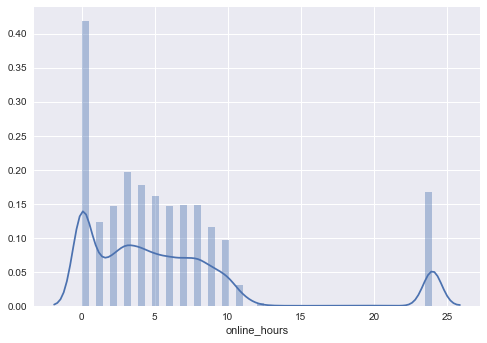

In [5]:
sns.distplot(train['online_hours'])

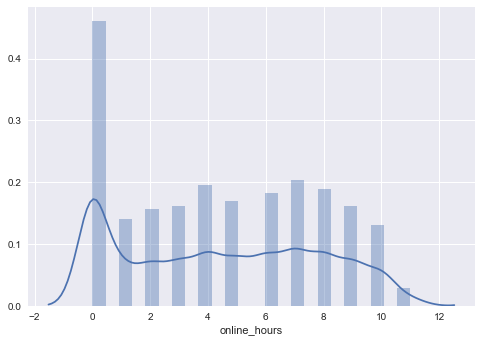

In [6]:
sns.distplot(test['online_hours'])

**Both the graphs show that the data is non normal**


**Few Other Observations:**
- There are days when the drivers were online for 24 hours in the Train Dataset while we do not see any such instance in Test. It will be good if we remove this from the train dataset.
- Large number of days are with zero online hours and same is the case for both train and test data

## Making changes to the train data before building the model

In [37]:
### Removing all those instances where drivers were online for 24 hours
train.shape
train[train['online_hours'] < 24].shape
train = train[train['online_hours'] < 24]

(52080, 9)

(47884, 9)

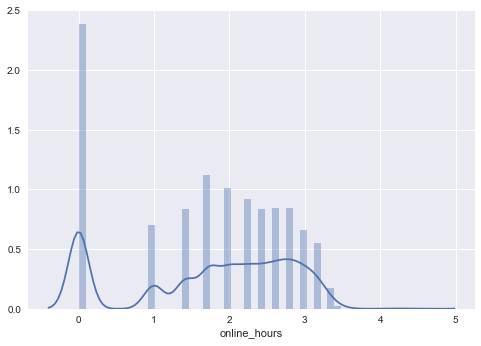

In [14]:
sns.distplot(np.sqrt(train['online_hours']))

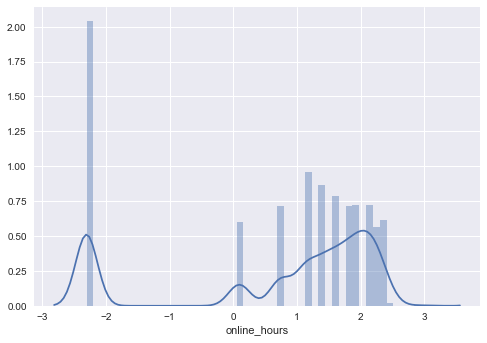

In [15]:
sns.distplot(np.log(train['online_hours'] + 0.1))

**Comment: None of the transformations can make it close to normal and hence having large number of zeroes is not suggesting to go for Linear Regression.However, building a Linear Regression model as a benchmark model.**

## 1. Building the first Linear Regression Model

In [30]:
### Training a Linear Regression Model

X = train[['number_of_kids', 'weekday', 'weekend_flag', 'age_bucket']]
Y = train['online_hours']

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

5.343504198528248


,Coefficient
number_of_kids,0.165984
weekday,-0.042007
weekend_flag,-1.288658
age_bucket,-0.513310


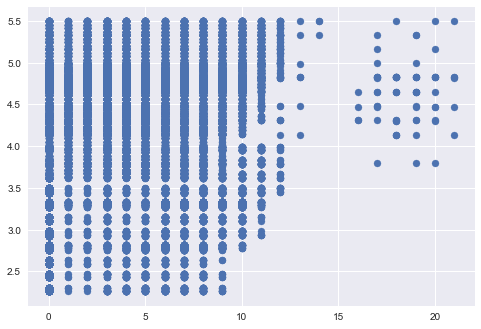

In [32]:
# print the intercept
print(lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

predictions = lm.predict(X)
plt.scatter(Y,predictions)

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
1n∑i=1n(yi−ŷ i)2

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. All of these are loss functions, because we want to minimize them.

In [33]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y, predictions)))

RMSE: 3.2783863811650202


***
***

## Creating Dummy Variables for Categorical features

### For Train Data

In [38]:
## Creating dummies using pandas for categorical variables
train.reset_index(drop = True, inplace= True)

dummies_gender = pd.get_dummies(train.gender)
train = train.join(dummies_gender)

dummies_weekday = pd.get_dummies(train.weekday, prefix= 'weekday', prefix_sep= '_')
train = train.join(dummies_weekday)

dummies_weekend_flag = pd.get_dummies(train.weekend_flag, prefix= 'weekend_flag', prefix_sep= '_')
train = train.join(dummies_weekend_flag)

dummies_age_bucket = pd.get_dummies(train.age_bucket, prefix= 'age_bucket', prefix_sep= '_')
train = train.join(dummies_age_bucket)
train.head()

,driver_id,date,online_hours,gender,age,number_of_kids,weekday,weekend_flag,age_bucket,FEMALE,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekend_flag_0,weekend_flag_1,age_bucket_1,age_bucket_2,age_bucket_3
0,111556,2017-06-01,2.0,FEMALE,49,4,3,0,2,1,...,0,1,0,0,0,1,0,0,1,0
1,111556,2017-06-02,2.0,FEMALE,49,4,4,0,2,1,...,0,0,1,0,0,1,0,0,1,0
2,111556,2017-06-03,0.0,FEMALE,49,4,5,1,2,1,...,0,0,0,1,0,0,1,0,1,0
3,111556,2017-06-04,0.0,FEMALE,49,4,6,1,2,1,...,0,0,0,0,1,0,1,0,1,0
4,111556,2017-06-05,5.0,FEMALE,49,4,0,0,2,1,...,0,0,0,0,0,1,0,0,1,0


### For Test Data

In [48]:
test.reset_index(drop = True, inplace= True)

dummies_gender = pd.get_dummies(test.gender)
test = test.join(dummies_gender)

dummies_weekday = pd.get_dummies(test.weekday, prefix= 'weekday', prefix_sep= '_')
test = test.join(dummies_weekday)

dummies_weekend_flag = pd.get_dummies(test.weekend_flag, prefix= 'weekend_flag', prefix_sep= '_')
test = test.join(dummies_weekend_flag)

dummies_age_bucket = pd.get_dummies(test.age_bucket, prefix= 'age_bucket', prefix_sep= '_')
test = test.join(dummies_age_bucket)
test.head()

,driver_id,date,online_hours,gender,age,number_of_kids,weekday,weekend_flag,age_bucket,FEMALE,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekend_flag_0,weekend_flag_1,age_bucket_1,age_bucket_2,age_bucket_3
0,111556,2017-06-22,2,FEMALE,49,4,3,0,2,1,...,0,1,0,0,0,1,0,0,1,0
1,111556,2017-06-23,5,FEMALE,49,4,4,0,2,1,...,0,0,1,0,0,1,0,0,1,0
2,111556,2017-06-24,0,FEMALE,49,4,5,1,2,1,...,0,0,0,1,0,0,1,0,1,0
3,111556,2017-06-25,0,FEMALE,49,4,6,1,2,1,...,0,0,0,0,1,0,1,0,1,0
4,111556,2017-06-26,0,FEMALE,49,4,0,0,2,1,...,0,0,0,0,0,1,0,0,1,0


In [46]:
# X = train[['number_of_kids', 'FEMALE', 'MALE', 'weekday_0',\
#        'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',\
#        'weekday_6', 'weekend_flag_0', 'weekend_flag_1', 'age_bucket_1',\
#        'age_bucket_2', 'age_bucket_3']]

X = train[['number_of_kids', 'FEMALE', 'MALE', 'weekend_flag_0', 'weekend_flag_1', 'age_bucket_1',\
       'age_bucket_2', 'age_bucket_3']]
Y = train['online_hours']

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

-100873064433.42949

,Coefficient
number_of_kids,1.669940e-01
FEMALE,-6.141208e+06
MALE,-6.141206e+06
weekend_flag_0,-1.500382e+06
weekend_flag_1,-1.500384e+06
age_bucket_1,1.008807e+11
age_bucket_2,1.008807e+11
age_bucket_3,1.008807e+11


RMSE: 3.1514493977991926


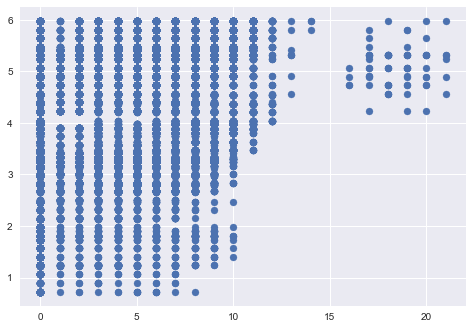

In [47]:
lm = LinearRegression()
lm.fit(X,Y)

# print the intercept
lm.intercept_

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

predictions = lm.predict(X)
plt.scatter(Y,predictions)

print('RMSE:', np.sqrt(metrics.mean_squared_error(Y, predictions)))

### Scoring the Test data

RMSE: 3.1699315545588345


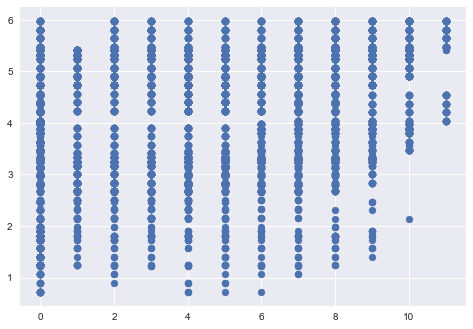

In [49]:
X = test[['number_of_kids', 'FEMALE', 'MALE', 'weekend_flag_0', 'weekend_flag_1', 'age_bucket_1',\
       'age_bucket_2', 'age_bucket_3']]
Y = test['online_hours']


predictions = lm.predict(X)
plt.scatter(Y,predictions)
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y, predictions)))

## 2. Building Random Forest Regression Model

**I went for Random Forest Model for it is non linear in nature and it takes into account various interaction of variables. I do not need to build these interactions.**

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
# Establish model
model = RandomForestRegressor(n_estimators= 1000, max_depth=5, n_jobs=-1)

In [64]:
# define the training data X...
X = train[['number_of_kids', 'FEMALE', 'MALE', 'weekday_0',\
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',\
       'weekday_6', 'weekend_flag_0', 'weekend_flag_1', 'age_bucket_1',\
       'age_bucket_2', 'age_bucket_3']]
Y = train['online_hours']

# and the data for the competition submission...
X_test = test[['number_of_kids', 'FEMALE', 'MALE', 'weekday_0',\
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',\
       'weekday_6', 'weekend_flag_0', 'weekend_flag_1', 'age_bucket_1',\
       'age_bucket_2', 'age_bucket_3']]
Y_test = test['online_hours']

In [72]:
# Try different numbers of n_estimators - this will take a minute or so
model.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Evaluating the Algorithm

#### Train Metrics

In [75]:
from sklearn import metrics
predictions = model.predict(X)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(Y, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, predictions)))

Mean Absolute Error: 2.6236198431306694
Mean Squared Error: 9.783719605010416
Root Mean Squared Error: 3.127893796951939


#### Test Metrics

In [76]:
predictions = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

Mean Absolute Error: 2.694449607784701
Mean Squared Error: 9.917853189781168
Root Mean Squared Error: 3.149262324701003
